## Import

In [1]:
from sklearn.mixture import GaussianMixture
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

## 초등 학생별 수준 군집화

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
%cd /content/drive/MyDrive/4일차_차원축소와군집화

/content/drive/MyDrive/4일차_차원축소와군집화


In [5]:
middle1_score_df = pd.read_csv('./datasets/중1_밀크T중학_AI진단평가_개인별전과목점수.csv',index_col=0)

In [ ]:
middle1_score_df[['국어','영어','수학','과학','사회','역사']].dropna()

In [7]:
input_data = middle1_score_df[['국어','영어','수학','과학','사회','역사']].dropna()

#### 1. PCA 진행하지 않고, GMM 적용해보기

In [8]:
# TODO

In [9]:
gmm = GaussianMixture(n_components=3, random_state=42)
gmm_labels = gmm.fit(input_data)

In [10]:
gmm_labels = gmm.predict(input_data)

In [11]:
input_data['gmm_cluster'] = gmm_labels

### 결과 과목별 시각화

In [12]:
def ploting_score(df):
    f, ax = plt.subplots(2,3)
    f.set_size_inches((25,10))

    plt.subplots_adjust(wspace = 0.3, hspace = 0.3)

    ############ 1 ###############

    sns.histplot(df[df['gmm_cluster'] == 0]['국어'].tolist(),
                color="tomato", ax = ax[0,0])
    sns.histplot(df[df['gmm_cluster'] == 1]['국어'].tolist(),
                color="mediumorchid", ax = ax[0,0])
    sns.histplot(df[df['gmm_cluster'] == 2]['국어'].tolist(),
                color="gold", ax = ax[0,0])
    ax[0,0].set_title('Korean')
    ax[0,0].set_xlim([-10,110])

    ############ 2 ###############

    sns.histplot(df[df['gmm_cluster'] == 0]['수학'].tolist(),
                color="tomato", ax = ax[0,1])
    sns.histplot(df[df['gmm_cluster'] == 1]['수학'].tolist(),
                color="mediumorchid", ax = ax[0,1])
    sns.histplot(df[df['gmm_cluster'] == 2]['수학'].tolist(),
                color="gold", ax = ax[0,1])
    ax[0,1].set_title('Math')
    ax[0,1].set_xlim([-10,110])


    ############ 3 ###############
    sns.histplot(df[df['gmm_cluster'] == 0]['영어'].tolist(),
                color="tomato",ax = ax[0,2])
    sns.histplot(df[df['gmm_cluster'] == 1]['영어'].tolist(),
                color="mediumorchid", ax = ax[0,2])
    sns.histplot(df[df['gmm_cluster'] == 2]['영어'].tolist(),
                color="gold", ax = ax[0,2])
    ax[0,2].set_title('English')
    ax[0,2].set_xlim([-10,110])

    ############ 4 ###############
    sns.histplot(df[df['gmm_cluster'] == 0]['사회'].tolist(),
                color="tomato", ax = ax[1,0])
    sns.histplot(df[df['gmm_cluster'] == 1]['사회'].tolist(),
                color="mediumorchid", ax = ax[1,0])
    sns.histplot(df[df['gmm_cluster'] == 2]['사회'].tolist(),
                color="gold", ax = ax[1,0])
    ax[1,0].set_title('Social')
    ax[1,0].set_xlim([-10,110])

    ############ 5 ###############
    sns.histplot(df[df['gmm_cluster'] == 0]['과학'].tolist(),
                color="tomato", ax = ax[1,1])
    sns.histplot(df[df['gmm_cluster'] == 1]['과학'].tolist(),
                color="mediumorchid", ax = ax[1,1])
    sns.histplot(df[df['gmm_cluster'] == 2]['과학'].tolist(),
                color="gold", ax = ax[1,1])
    ax[1,1].set_title('Science')
    ax[1,1].set_xlim([-10,110])

    ############ 6 ###############
    sns.histplot(df[df['gmm_cluster'] == 0]['역사'].tolist(),
                color="tomato", ax = ax[1,2])
    sns.histplot(df[df['gmm_cluster'] == 1]['역사'].tolist(),
                color="mediumorchid", ax = ax[1,2])
    sns.histplot(df[df['gmm_cluster'] == 2]['역사'].tolist(),
                color="gold", ax = ax[1,2])
    ax[1,2].set_title('History')
    ax[1,2].set_xlim([-10,110])

    plt.xlim(0,100)
    plt.show()

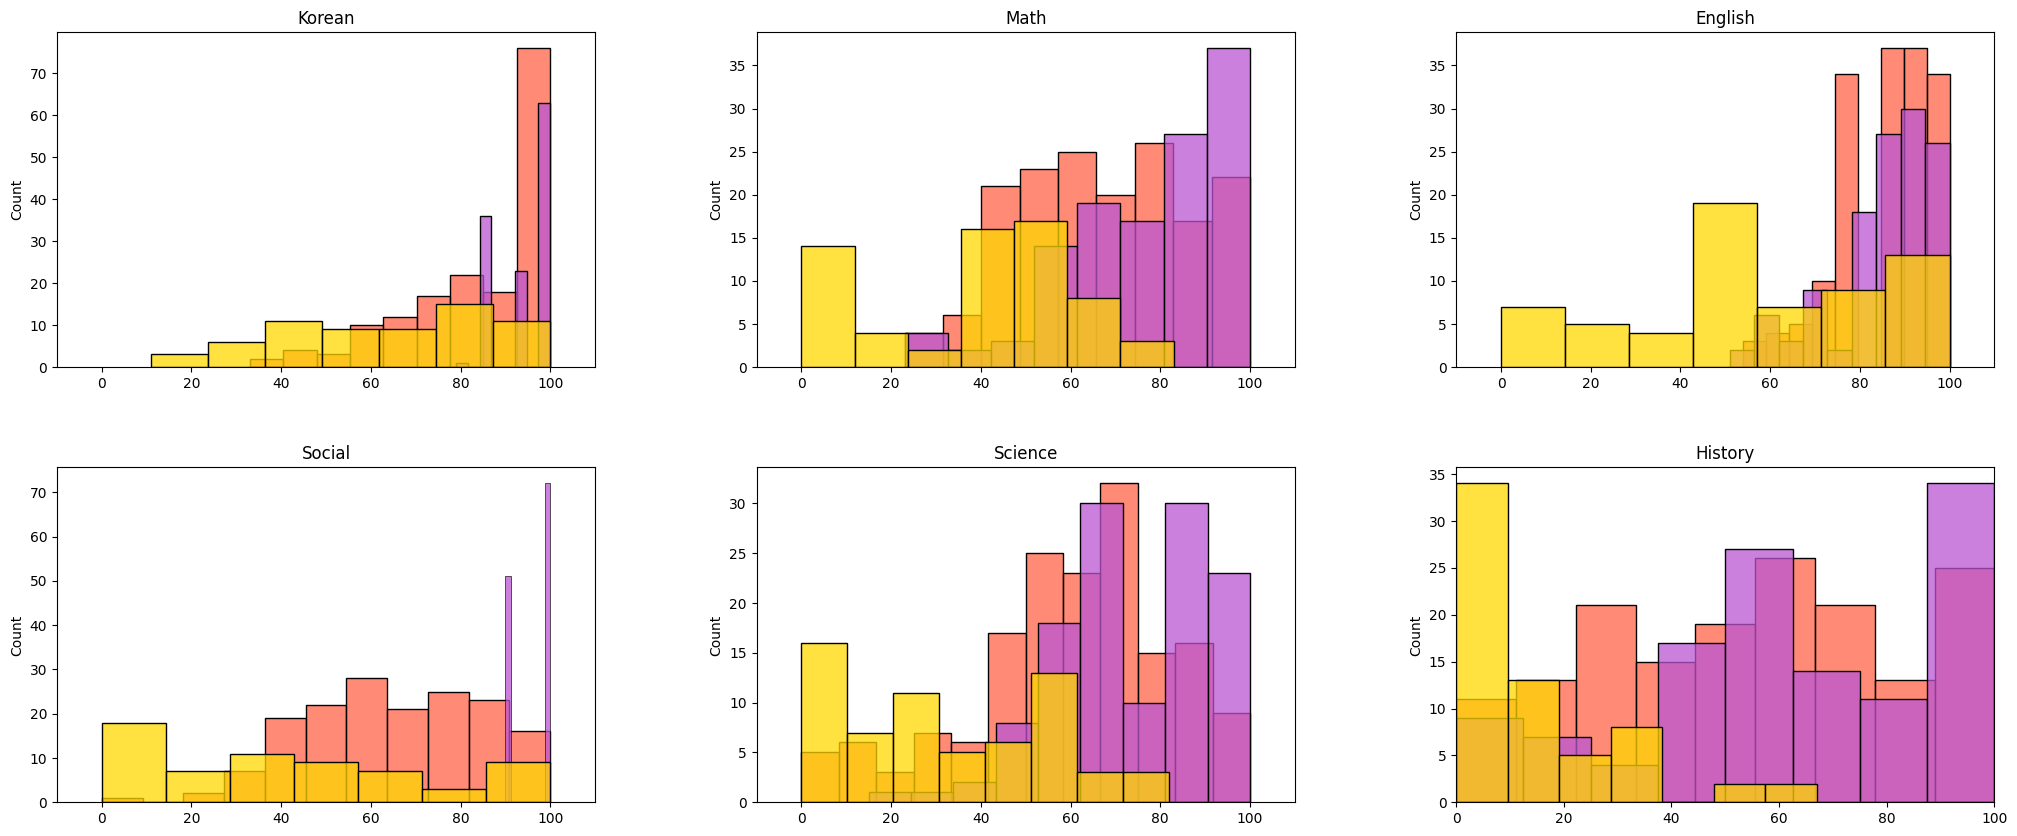

In [13]:
ploting_score(input_data)

In [14]:
input_data

,국어,영어,수학,과학,사회,역사,gmm_cluster
3,68.0,86.0,57.0,15.0,53.0,45.0,0
10,79.0,93.0,46.0,30.0,45.0,15.0,0
13,93.0,100.0,48.0,56.0,63.0,100.0,0
23,100.0,100.0,88.0,61.0,90.0,33.0,1
32,93.0,100.0,65.0,53.0,45.0,90.0,0
...,...,...,...,...,...,...,...
1888,86.0,68.0,94.0,90.0,100.0,79.0,1
2014,65.0,58.0,63.0,0.0,0.0,0.0,2
2349,54.0,79.0,51.0,90.0,90.0,71.0,0
3165,47.0,93.0,55.0,30.0,100.0,71.0,0


#### 2. 국어와 수학과목의 성적이 유사한 사용자끼리 묶이도록 K-means 활용하여 5개의 군집 만들기

In [15]:
## X : 국어 , Y : 수학 #두가지 피쳐만 사용해서 k-means 사용하렴~?

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 49688 (\N{HANGUL SYLLABLE SU}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 54617 (\N{HANGUL SYLLABLE HAG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 44397 (\N{HANGUL SYLLABLE GUG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 50612 (\N{HANGUL SYLLABLE EO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


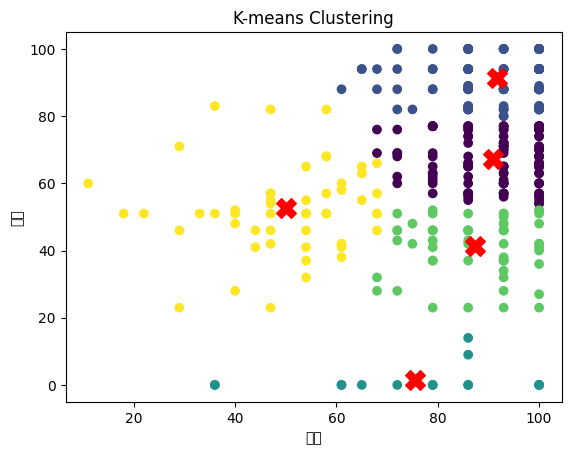

클러스터 결과:
          국어    수학  Cluster
3      68.0  57.0        4
10     79.0  46.0        3
13     93.0  48.0        3
23    100.0  88.0        1
32     93.0  65.0        0
...     ...   ...      ...
1888   86.0  94.0        1
2014   65.0  63.0        4
2349   54.0  51.0        4
3165   47.0  55.0        4
3472   86.0  66.0        0

[351 rows x 3 columns]

클러스터 중심점:
           국어         수학
0  90.879310  67.353448
1  91.681416  91.283186
2  75.533333   1.533333
3  87.363636  41.236364
4  49.980769  52.519231


In [16]:
from sklearn.cluster import KMeans

X = input_data[['국어', '수학']]

kmeans = KMeans(n_clusters=5, random_state=42)
kmeans.fit(X)

input_data['Cluster'] = kmeans.labels_


cluster_centers = pd.DataFrame(kmeans.cluster_centers_, columns=['국어', '수학'])

plt.scatter(input_data['국어'], input_data['수학'], c=input_data['Cluster'], cmap='viridis')
plt.scatter(cluster_centers['국어'], cluster_centers['수학'], marker='X', s=200, c='red')
plt.xlabel('국어')
plt.ylabel('수학')
plt.title('K-means Clustering')
plt.show()


print("클러스터 결과:\n", input_data[['국어', '수학', 'Cluster']])
print("\n클러스터 중심점:\n", cluster_centers)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


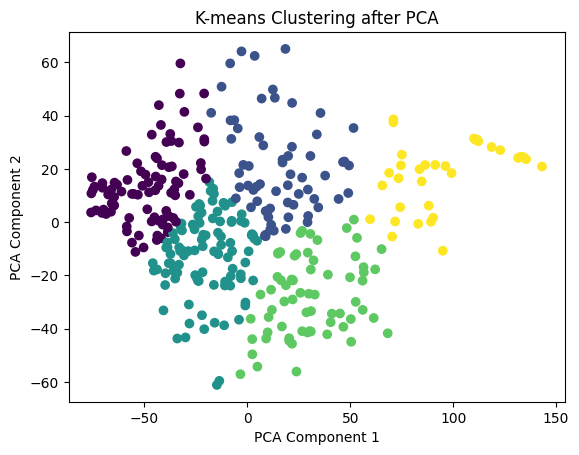

클러스터 결과:
          국어    수학  Cluster
3      68.0  57.0        1
10     79.0  46.0        3
13     93.0  48.0        0
23    100.0  88.0        2
32     93.0  65.0        1
...     ...   ...      ...
1888   86.0  94.0        0
2014   65.0  63.0        4
2349   54.0  51.0        2
3165   47.0  55.0        2
3472   86.0  66.0        2

[351 rows x 3 columns]


In [17]:
from sklearn.decomposition import PCA



pca = PCA(n_components=2)
X_pca = pca.fit_transform(input_data)


kmeans = KMeans(n_clusters=5, random_state=42)
kmeans.fit(X_pca)


input_data['Cluster'] = kmeans.labels_


plt.scatter(X_pca[:, 0], X_pca[:, 1], c=input_data['Cluster'], cmap='viridis')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('K-means Clustering after PCA')
plt.show()

print("클러스터 결과:\n", input_data[['국어', '수학', 'Cluster']])

#### 느낀점

ex. 시각화결과를 보니 PCA가 ~~ 역할을 해준 것 같다.

ex. K-means를 항상 사용할 수 있을 까?

In [18]:
# pca가 모델의 복잡도를 낮춰준 것 같다. 시각화 시 분류에 명확도를 높여주는 것 같다.

#### PCA의 기능

PCA를 통해서 저희는 기존의 6개의 과목 데이터를 모두 활용하는 것이 아닌, 2개의 피쳐로 축소하여 사용했었고,

PCA를 진행하지 않는다면 6개의 과목 피쳐를 모두 고려하여 군집화를 하게 됩니다.



보내주신 시각화그림을 보면, PCA를 사용했을 때는 수학, 사회, 과학 과목의 수준 분류와 가우시안분포가 비교적 명확한 것으로 보아

수학, 사회, 과학 피쳐값의 분산이 큰 방향(주성분)으로 차원축소가 된 듯 합니다.



반대로 PCA를 사용하지 않았을 때는 시각화 결과를 보시다시피, 군집화 시 모든 과목의 점수를 고려하다 보니

수준분류에 영향을 많이 미친 과목의 모습이 특정되어 보이지 않아 어떤 과목이 수준분류에 큰 영향을 미치는지를 확인하기 어렵고,

수학, 사회, 과학 과목의 각 클러스터내의 값이 중복되어 분포된 것을 확인할 수 있습니다.



그래서 결론은, PCA를 사용하게 되면 모든 피쳐를 고려했을 때 보다 중요한 피쳐만 사용하여

정보의 손실은 일어나지만 오히려 어떤 과목이 수준분류에 도움을 주고 큰 영향을 주는 지를 확인할 수 있는 역할을 할 수 있습니다.

